[View in Colaboratory](https://colab.research.google.com/github/rajagopalmotivate/DeepLearnIITMA1/blob/master/Extra_plots_DG_5_class.ipynb)

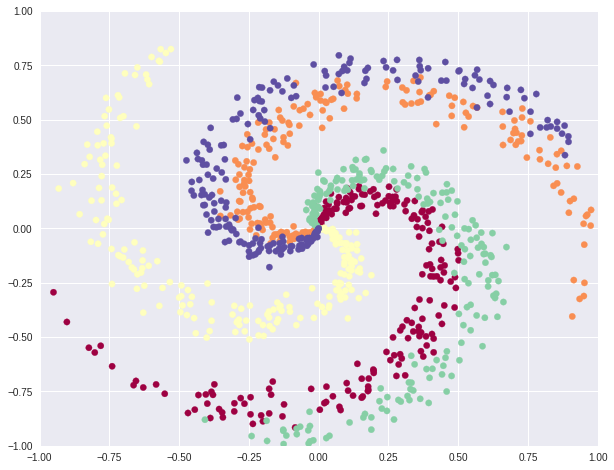

num_examples is = 1000
X = 
W = 
W2 = 
0 1.609358129005597
hidden_layer (1000, 300)
scores (1000, 5)
loss = 1.609358129005597
probs (1000, 5)
dscores (1000, 5)
iteration ,     loss
100 1.2239518971604109
200 1.1684367494576056
300 1.1537247415736143
400 1.0113184564380846
500 0.8517619468143197
600 0.7465217969188692
700 0.6629859080274763
800 0.5943074156955879
900 0.5627383898689446
1000 0.5122235147588979
1100 0.4785791957287408
1200 0.45446276167690663
1300 0.43052830726795405
1400 0.42114770620921044
1500 0.4000947193657847
1600 0.38951947764322287
1700 0.36927448174114236
1800 0.365940275214422
1900 0.3500926415674501
2000 0.3516552835275015
2100 0.37813629301529833
2200 0.31194591786957726
2300 0.35086137443445775
2400 0.31453243153407673
2500 0.32065569774672587
2600 0.3069058612515893
2700 0.3495392616995412
2800 0.27826852165766025
2900 0.29576343438612007
3000 0.2826827954124033
3100 0.2750028150304212
3200 0.38168683542360016
3300 0.4223344944405485


In [0]:
# cross entropy softmax, ReLu
import numpy as np
import matplotlib.pyplot as plt

# WORKS WELL , Single FC layer , copied from Standford

#----
#from datain import *

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)
N = 200 # number of points per class
D = 2 # dimensionality
K = 5 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

#---

# initialize parameters randomly
h = 300 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e0
reg = 1e-5 # regularization strength

num_examples = X.shape[0]
print('num_examples is = ' + str(num_examples))

print('X = ')
#print(X)


print('W = ')
#print(W)


print('W2 = ')
#print(W2)


for i in range(12000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2




    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss

    if i==1:
        print('iteration ,     loss')
    if i % 100 == 0:
        print(i, loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    if i == 0:
        print('hidden_layer ' + str(hidden_layer.shape ))
        print('scores ' + str(scores.shape))
        #print('corect_logprobs = ' + str(corect_logprobs))
        print('loss = ' + str(loss))
        print('probs ' + str(probs.shape))
        print('dscores ' + str(dscores.shape))

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2


# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('Training accuracy = ')
print ((np.mean(predicted_class == y)))



In [0]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()